<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Authors: Joseph Nelson (DC)_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1. Load the NHL data

In [3]:
# A:
df = pd.read_csv('/Users/rahmanss/Downloads/DAT-course-materials-students-12-9-master/homework/NHL_DATA_GA.csv')

### 2. Perform any required data cleaning. Do some EDA.

In [4]:
# A:
df.shape

(90, 28)

In [6]:
df.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


In [5]:
df.describe()

,PTS,Rank,GF,GA,GF60,GA60,GF%,SF,SA,SF60,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,91.977778,2.022222,83.288889,83.288889,2.442222,2.444000,49.981111,1068.333333,1068.333333,31.252222,...,49.966667,1973.466667,1973.466667,57.735556,57.798889,49.972222,7.814556,92.182556,999.988889,990.966667
std,12.524114,0.820767,10.376339,9.694484,0.325331,0.313522,4.644554,95.929047,75.514118,2.237637,...,2.797913,176.468299,154.148928,4.124476,4.291106,2.844313,0.866942,0.928621,12.292772,178.049321
min,62.000000,1.000000,57.000000,64.000000,1.700000,1.730000,38.000000,815.000000,868.000000,25.800000,...,43.100000,1565.000000,1572.000000,49.500000,46.700000,43.700000,5.900000,89.830000,978.000000,689.000000
25%,82.250000,1.000000,76.000000,75.500000,2.232500,2.202500,46.825000,1011.500000,1022.250000,29.550000,...,47.775000,1855.250000,1877.000000,54.275000,54.600000,47.925000,7.235000,91.555000,992.000000,881.250000
50%,92.500000,2.000000,84.000000,84.000000,2.400000,2.495000,49.700000,1072.000000,1072.000000,31.400000,...,50.050000,1981.500000,1961.000000,58.050000,58.350000,50.400000,7.730000,92.250000,1000.500000,960.000000
75%,102.000000,3.000000,90.000000,89.000000,2.600000,2.670000,53.625000,1143.000000,1125.750000,32.775000,...,51.775000,2112.750000,2077.250000,60.850000,60.400000,52.000000,8.270000,92.870000,1007.750000,1101.500000
max,121.000000,3.000000,115.000000,107.000000,3.450000,3.240000,61.200000,1311.000000,1245.000000,35.600000,...,58.100000,2341.000000,2332.000000,64.900000,67.500000,57.100000,10.340000,93.940000,1034.000000,1515.000000


In [7]:
df.isnull().sum()

Team    0
PTS     0
Rank    0
TOI     0
GF      0
GA      0
GF60    0
GA60    0
GF%     0
SF      0
SA      0
SF60    0
SA60    0
SF%     0
FF      0
FA      0
FF60    0
FA60    0
FF%     0
CF      0
CA      0
CF60    0
CA60    0
CF%     0
Sh%     0
Sv%     0
PDO     0
PIM     0
dtype: int64

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [8]:
# A: There are three classes
y = df.Rank

### 4. What is the baseline accuracy?

In [9]:
# A:
most_freq_class = y.value_counts().index[0]

print(y.value_counts())
most_freq_class

3    31
2    30
1    29
Name: Rank, dtype: int64


3

In [10]:
y.value_counts()[most_freq_class] / len(y)

0.34444444444444444

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [13]:
#pd.plotting.scatter_matrix(df, c=df.Rank, figsize=(12, 10))

In [11]:
pd.set_option('display.max_columns', 500)
round(df.corr(),2) #Here we can look at the things that correspond beth with rank (GF%, CF%, SF%, FF%)

,PTS,Rank,GF,GA,GF60,GA60,GF%,SF,SA,SF60,SA60,SF%,FF,FA,FF60,FA60,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
PTS,1.00,-0.91,0.56,-0.58,0.48,-0.59,0.74,0.45,-0.31,0.47,-0.45,0.57,0.45,-0.33,0.47,-0.47,0.58,0.42,-0.38,0.42,-0.51,0.59,0.27,0.37,0.47,0.18
Rank,-0.91,1.00,-0.48,0.54,-0.41,0.54,-0.65,-0.45,0.32,-0.48,0.44,-0.58,-0.43,0.36,-0.47,0.48,-0.59,-0.38,0.42,-0.40,0.54,-0.60,-0.17,-0.32,-0.37,-0.17
GF,0.56,-0.48,1.00,-0.18,0.92,-0.21,0.79,0.51,-0.15,0.60,-0.22,0.52,0.49,-0.14,0.58,-0.21,0.49,0.48,-0.15,0.56,-0.22,0.50,0.71,0.08,0.56,0.09
GA,-0.58,0.54,-0.18,1.00,-0.17,0.91,-0.75,-0.16,0.29,-0.18,0.33,-0.32,-0.17,0.29,-0.20,0.33,-0.33,-0.18,0.32,-0.20,0.36,-0.36,-0.08,-0.80,-0.67,-0.22
GF60,0.48,-0.41,0.92,-0.17,1.00,-0.04,0.72,0.24,-0.32,0.56,-0.09,0.41,0.20,-0.31,0.53,-0.09,0.38,0.22,-0.32,0.52,-0.11,0.40,0.83,-0.04,0.56,0.15
GA60,-0.59,0.54,-0.21,0.91,-0.04,1.00,-0.72,-0.40,0.08,-0.19,0.43,-0.38,-0.42,0.09,-0.21,0.42,-0.39,-0.41,0.13,-0.20,0.44,-0.41,0.08,-0.85,-0.59,-0.15
GF%,0.74,-0.65,0.79,-0.75,0.72,-0.72,1.00,0.46,-0.28,0.52,-0.36,0.55,0.45,-0.27,0.52,-0.35,0.54,0.45,-0.30,0.51,-0.38,0.56,0.52,0.56,0.79,0.19
SF,0.45,-0.45,0.51,-0.16,0.24,-0.40,0.46,1.00,0.09,0.81,-0.40,0.77,0.96,0.03,0.77,-0.44,0.75,0.92,0.00,0.70,-0.44,0.73,-0.24,0.20,-0.01,0.06
SA,-0.31,0.32,-0.15,0.29,-0.32,0.08,-0.28,0.09,1.00,-0.22,0.71,-0.57,0.11,0.94,-0.21,0.65,-0.54,0.13,0.87,-0.17,0.60,-0.51,-0.23,0.33,0.09,-0.07
SF60,0.47,-0.48,0.60,-0.18,0.56,-0.19,0.52,0.81,-0.22,1.00,-0.27,0.81,0.74,-0.28,0.94,-0.33,0.79,0.71,-0.30,0.87,-0.35,0.78,0.01,0.03,0.03,0.19


In [12]:
# A:
feature_cols = ['GF%', 'CF%', 'SF%', 'FF%']
X = df[feature_cols]

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [13]:
# A:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=1, weights = 'distance')
knn.fit(X, y)
y_pred_class = knn.predict(X)
print((metrics.accuracy_score(y, y_pred_class)))

1.0


### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [9]:
# A: Better than baseline, but not legitimate since we tested on the inout data so we got perfect accuracy

### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [14]:
# A:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, test_size = .5)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.4666666666666667


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [15]:
# A:
#X_train.shape
knn = KNeighborsClassifier(n_neighbors=45, weights = 'distance')
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.6


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

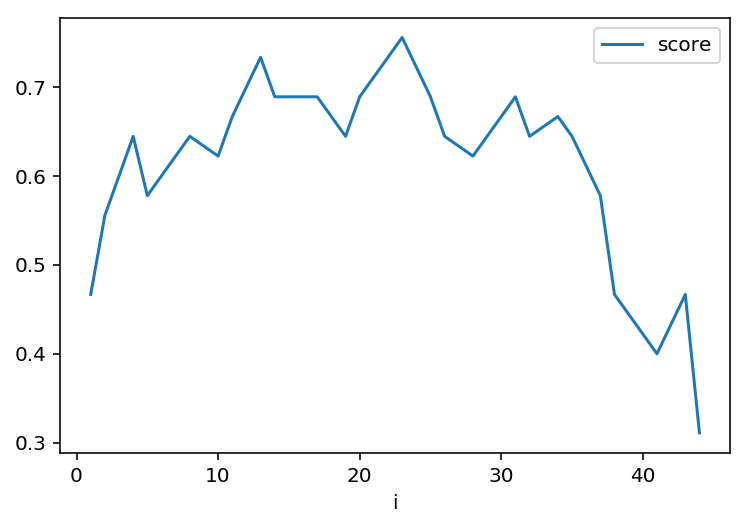

In [16]:
# A:
scores = []
for i in range(1,46):
    if i % 3 == 0:
        continue
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    score = metrics.accuracy_score(y_test, pred)
    scores.append([i, score])
    
data = pd.DataFrame(scores,columns=['i','score'])
data.plot.line(x='i',y='score');

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [17]:
# A:
from sklearn import model_selection
kf = model_selection.KFold(n_splits=5, shuffle=True)

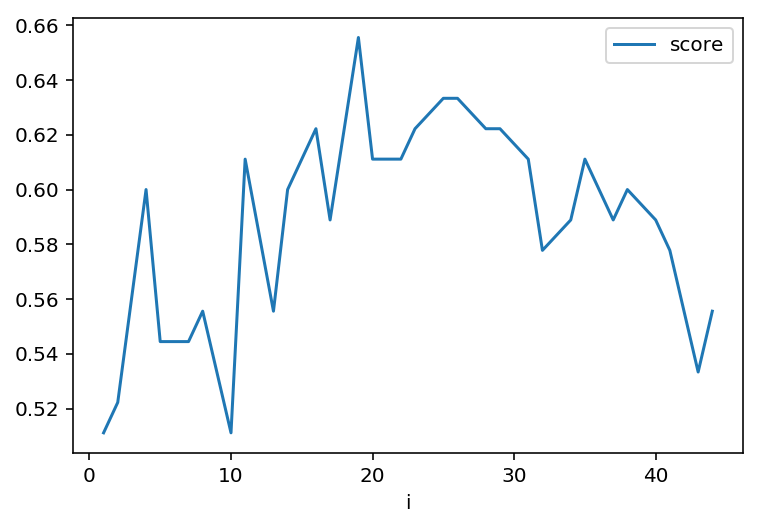

In [38]:
mean_scores = []
for i in range(1,46):
    if i % 3 == 0:
        continue
        
    scores = []
    for train_index, test_index in kf.split(X, y):
        knn = KNeighborsClassifier(n_neighbors=i).fit(X.iloc[train_index], y.iloc[train_index])
    
    
        scores.append(metrics.accuracy_score(y.iloc[test_index], knn.predict(X.iloc[test_index])))
    
    mean_scores.append([i, np.mean(scores)])    
    
    
    #print('Model {}'.format(n))
    #print('Score: {}\n'.format(scores[n-1]))


#print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
#print('Mean of accuracy for all folds: {}'.format(np.mean(scores)))
data = pd.DataFrame(mean_scores,columns=['i','score'])
data.plot.line(x='i',y='score');

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [18]:
# A:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [19]:
X = pd.DataFrame(X)

In [23]:
X

,0,1,2,3
0,2.429025,0.893692,0.555569,0.479215
1,1.433070,1.211885,0.735559,1.126156
2,1.519674,0.504788,0.231587,0.335451
3,1.216557,2.520014,2.787446,2.923215
4,0.826836,0.929046,-0.272385,0.371392
5,0.891789,-0.485147,0.195589,-0.023961
6,1.562977,1.388659,1.599512,1.665274
7,0.307207,1.848272,2.283474,1.952803
8,0.610324,0.504788,0.627565,0.299510
9,0.393811,0.292659,0.339581,0.083863


In [21]:
'''
knn = KNeighborsClassifier(n_neighbors=18)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)


print(testing_accuracy)
'''

'\nknn = KNeighborsClassifier(n_neighbors=18)\nknn.fit(X_train, y_train)\n\ny_pred_class = knn.predict(X_test)\ntesting_accuracy = metrics.accuracy_score(y_test, y_pred_class)\n\n\nprint(testing_accuracy)\n'

In [22]:
mean_scores_standardized = []
for i in range(1,46):
    if i % 3 == 0:
        continue
        
    scores = []
    for train_index, test_index in kf.split(X, y):
        knn = KNeighborsClassifier(n_neighbors=i).fit(X.iloc[train_index], y.iloc[train_index])
    
    
        scores.append(metrics.accuracy_score(y.iloc[test_index], knn.predict(X.iloc[test_index])))
    
    mean_scores_standardized.append([i, np.mean(scores)])    
    

data = pd.DataFrame(mean_scores,columns=['i','score'])
data.plot.line(x='i',y='score');

NameError: name 'mean_scores' is not defined

In [ ]:
# I feel like it should get better after the scaling, not sure why it's the same